Ваша задача — проверить, как изменился мир тенниса за последнее время. Для анализа используйте этот датасет. Применяйте только данные из одиночного разряда (файлы в формате «atp_matches_YYYY.csv»). Желательно сопровождать выбранный статистический тест ссылкой на его документацию и указывать нулевую гипотезу, которую этот тест проверяет. Далеко не всегда это очевидно.

#### Подготовка

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os

from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
from scipy.stats import wilcoxon
from scipy.stats import chi2_contingency

In [6]:
# Сбор датасета

#Папка с файлами
folder_path = 'D:\_МФТИ\Анализ данных\hw_data'


all_csv_files = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        csv_file = pd.read_csv(file_path)
        all_csv_files.append(csv_file)
        
#Стартовый датасет        
start_dataset = pd.concat(all_csv_files, ignore_index=True) 
pd.set_option('display.max_columns', None)

In [7]:
start_dataset.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1988-201,Guaruja,Hard,32,A,19880125,1,100586,1.0,NaN,Eliot Teltscher,R,178.0,USA,28.8,100548,NaN,NaN,Ivan Kley,R,183.0,BRA,29.5,7-5 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,251.0,NaN
1,1988-201,Guaruja,Hard,32,A,19880125,2,101133,NaN,NaN,Patrick Baur,R,188.0,GER,22.7,100986,NaN,WC,Dacio Campos,R,185.0,BRA,24.1,7-5 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0,NaN,317.0,NaN
2,1988-201,Guaruja,Hard,32,A,19880125,3,100669,NaN,NaN,Charles Bud Cox,R,196.0,USA,27.7,101076,NaN,NaN,Cesar Kist,R,180.0,BRA,23.2,6-2 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,232.0,NaN,205.0,NaN
3,1988-201,Guaruja,Hard,32,A,19880125,4,100782,8.0,NaN,Pablo Arraya,R,180.0,PER,26.2,100518,NaN,NaN,Ricardo Acuna,R,175.0,CHI,30.0,6-4 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.0,NaN,190.0,NaN
4,1988-201,Guaruja,Hard,32,A,19880125,5,101318,4.0,NaN,Javier Frana,L,185.0,ARG,21.0,101250,NaN,NaN,Jose Daher,R,180.0,BRA,21.7,7-6 7-6,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.0,NaN,157.0,NaN


In [8]:
start_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116296 entries, 0 to 116295
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          116296 non-null  object 
 1   tourney_name        116296 non-null  object 
 2   surface             116243 non-null  object 
 3   draw_size           116296 non-null  int64  
 4   tourney_level       116296 non-null  object 
 5   tourney_date        116296 non-null  int64  
 6   match_num           116296 non-null  int64  
 7   winner_id           116296 non-null  int64  
 8   winner_seed         47166 non-null   float64
 9   winner_entry        14020 non-null   object 
 10  winner_name         116296 non-null  object 
 11  winner_hand         116287 non-null  object 
 12  winner_ht           113446 non-null  float64
 13  winner_ioc          116296 non-null  object 
 14  winner_age          116272 non-null  float64
 15  loser_id            116296 non-nul

### Задача 1

Вы хотите узнать, как много значит ранг игрока в теннисе. Проверьте следующие утверждения:

а) Если ранг игрока выше более, чем на 20 позиций, то в среднем он будет выигрывать с большей вероятностью. (Если хотите проверить статистически — формируйте выборку как отклонение от ожидаемого количества побед при случайном исходе);

б) Если ранг игрока находится в окне +-5 позиций, то вероятность победы будет значительно отличаться от гипотезы из предыдущего случая. Для проверки статистической значимости выборку можно сделать как среднее по годам (например, с 1980 по 2022г.). Подумайте, как правильно сформировать репрезентативную выборку.

##№# 1а

а) Если ранг игрока выше более, чем на 20 позиций, то в среднем он будет выигрывать с большей вероятностью. (Если хотите проверить статистически — формируйте выборку как отклонение от ожидаемого количества побед при случайном исходе);

**Н0** - Вероятность выигрыша одинакова невзирая на различия в рангах более, чем на 20 позиций.

**Н1** - Если ранг игрока выше более, чем на 20 позиций, то в среднем он будет выигрывать с большей вероятностью.

In [9]:
# Определеям датасет для первой задачи
data1 = start_dataset.copy()

# Удаляем пропуски
data1.dropna(subset=['winner_rank', 'loser_rank'], inplace=True)

In [10]:
# Колонка с разницей в рангах
data1['rank_diff'] = abs(data1['winner_rank'] - data1['loser_rank'])

# Выборки с разницей более 20 рангов и менее
diff_rank_plus_20 = data1[data1['rank_diff'] > 20]
diff_rank_minus_20 = data1[data1['rank_diff'] < 20]

In [11]:
# Кол-во побед в каждой выборке

winners_plus_20 = (
  diff_rank_plus_20
    .groupby(['winner_id'])
    .agg({'match_num': 'count'})
    .reset_index()
    .rename(columns={'match_num': 'wins', 'winner_id': 'player_id'})
)


winners_minus_20 = (
  diff_rank_minus_20
   .groupby(['winner_id'])
    .agg({'match_num': 'count'})
    .reset_index()
    .rename(columns={'match_num': 'wins', 'winner_id': 'player_id'})
)

In [12]:
# Подсчет кол-ва поражений
losing_count = (data1
    .groupby(['loser_id'])
    .agg({'match_num':'count'})
    .reset_index()
    .rename(columns={'match_num': 'losses', 'loser_id': 'player_id'})
    )

# Объединение побед и поражений для каждого игрока
winners_plus_20 = winners_plus_20.merge(losing_count, on='player_id', how='left')
winners_minus_20 = winners_minus_20.merge(losing_count, on='player_id', how='left')

# Замена пропусков на 0 и приведение к int
winners_plus_20['losses'] = winners_plus_20['losses'].fillna(0)
winners_plus_20['losses'] = winners_plus_20['losses'].astype(int)

winners_minus_20['losses'] = winners_minus_20['losses'].fillna(0)
winners_minus_20['losses'] = winners_minus_20['losses'].astype(int)

# Количество игр на каждого игрока
winners_plus_20['game_count'] = winners_plus_20['losses'] + winners_plus_20['wins']
winners_minus_20['game_count'] = winners_minus_20['losses'] + winners_minus_20['wins']

In [13]:
# Подсчет ожидаемого кол-ва побед при случайном исходе (кол-во сыгранных игр * 50%)
winners_plus_20['expected_games'] = winners_plus_20['game_count'] * 0.5
winners_minus_20['expected_games'] = winners_minus_20['game_count'] * 0.5

winners_plus_20['expected_games'] = winners_plus_20['game_count'].astype(int)
winners_minus_20['expected_games'] = winners_minus_20['game_count'].astype(int)

In [14]:
# Отклонение ожидаемого кол-ва побед от фактического
winners_plus_20['win_deviation'] = winners_plus_20['wins'] - winners_plus_20['expected_games']
winners_minus_20['win_deviation'] = winners_minus_20['wins'] - winners_minus_20['expected_games']

In [15]:
# Среднее отклонение фактического количества побед от расчетного
print(winners_plus_20['win_deviation'].mean())
print(winners_minus_20['win_deviation'].mean())

-52.27028301886792
-97.33176691729324


Text(0.5, 1.0, 'Распределение < 20 рангов')

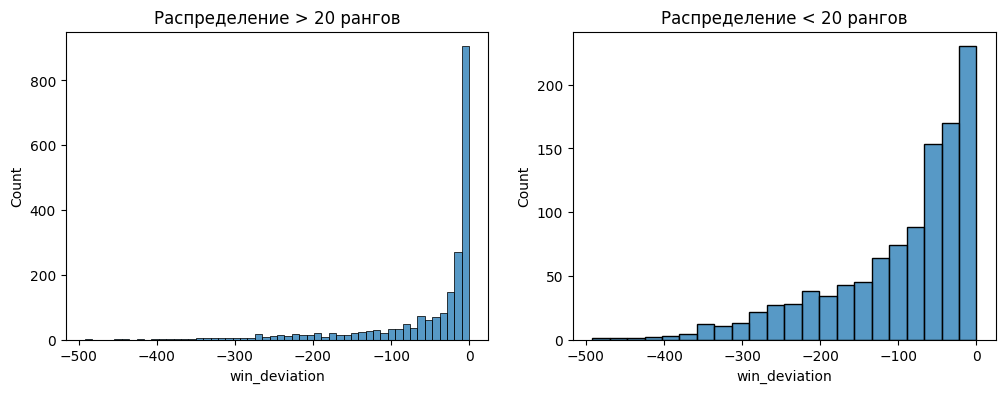

In [16]:
# Вывод графиков распредения отклонение фактического количества побед от расчетного
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# гистограмма
sns.histplot(x = 'win_deviation', data = winners_plus_20, ax=axes[0])
sns.histplot(x = 'win_deviation', data = winners_minus_20, ax=axes[1])

#названия графиков
axes[0].set_title('Распределение > 20 рангов')
axes[1].set_title('Распределение < 20 рангов')

In [17]:
#  Нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение одной или обеих группах отлично от нормального'
alpha = 0.05 # уровень значимости

# Теста Шапиро-Уилка
shapiro_plus = shapiro(winners_plus_20['win_deviation'])
shapiro_minus = shapiro(winners_minus_20['win_deviation'])

# Сравнение полученного p-value с уровнем значимости
if shapiro_plus.pvalue < alpha or shapiro_minus.pvalue < alpha:
    print('Нулевая гипотеза отвергнута. Принята гипотеза Н1: {}'.format(H1))
else:
    print('Принята нулевая гипотеза: {}'.format(H0))

Нулевая гипотеза отвергнута. Принята гипотеза Н1: Распределение одной или обеих группах отлично от нормального


Вывод: распределения в одной или обеих группах отличаются от нормального.

In [18]:
# Исходя из вывода необходимо использовать непараметрический тест

# нулевая и альтернативная гипотезы
H0 = 'При различиях в рангах средняя вероятность победы не будет отличаться'
H1 = 'При различиях в рангах вероятность победы будет выше'
alpha = 0.05 # уровень значимости

# Тест Манна-Уитни
mann_whitneyu = mannwhitneyu(winners_minus_20['win_deviation'],
                             winners_plus_20['win_deviation'],
                             alternative='greater')

# сравниваем полученное p-value с уровнем значимости
if mann_whitneyu.pvalue < alpha:
    print('Нулевая гипотеза отвергнута. Принята гипотеза Н1: {}'.format(H1))
else:
    print('Принята нулевая гипотеза: {}'.format(H0))

Принята нулевая гипотеза: При различиях в рангах средняя вероятность победы не будет отличаться


**Вывод:** на основании теста Манна-Уитни нулевая гипотеза не может быть опровергнута: при различиях в рангах более чем на 20 позиций, средняя вероятность победы не будет отличаться, от средней вероятности победы при различии в рангах менее чем на 20 позиций.


#### 1б

Если ранг игрока находится в окне +-5 позиций, то вероятность победы будет значительно отличаться от гипотезы из предыдущего случая. Для проверки статистической значимости выборку можно сделать как среднее по годам (например, с 1980 по 2022г.). Подумайте, как правильно сформировать репрезентативную выборку.

**Н0** - при различиях в рангах на 5 позиций, средняя вероятность победы не будет отличаться от средней вероятности победы при различии в рангах более чем на 20 позиций

**Н1** - при различиях в рангах более чем на 20 позиций, вероятность победы будет выше, чем при различии в рангах на 5 позиций


In [20]:
# Датасет с разницей в 5 рангов

data_5 = data1[data1['rank_diff'] <= 5]

# Фактическое количество побед
winners = (
    data_5
    .groupby(['winner_id'])
    .agg({'match_num':"count"})
    .reset_index()
    .rename(columns = {'match_num': 'wins', 'winner_id': 'player_id'})
)

# Объединение побед и поражений для каждого игрока
winners = winners.merge(losing_count, on='player_id', how='left')

# Замена пропусков на 0 и приведение к int
winners['losses'] = winners['losses'].fillna(0)
winners['losses'] = winners['losses'].astype(int)

# Общее количество игр на каждого игрока
winners['game_count'] = winners['losses'] + winners['wins']

# Подсчет ожидаемого кол-ва побед при случайном исходе 
# (кол-во сыгранных игр * 50%)
winners['expected_count'] = winners['game_count'] * 0.5
winners['expected_count'] = winners['expected_count'].astype(int)

# Вычислим отклонение фактического количества побед от ожидаемого для каждого игрока.
winners['win_deviation'] = winners['wins'] - winners['expected_count']

# Посчитаем среднее отклонение фактического количества побед от расчетного
winners['win_deviation'].mean()

-56.00251572327044

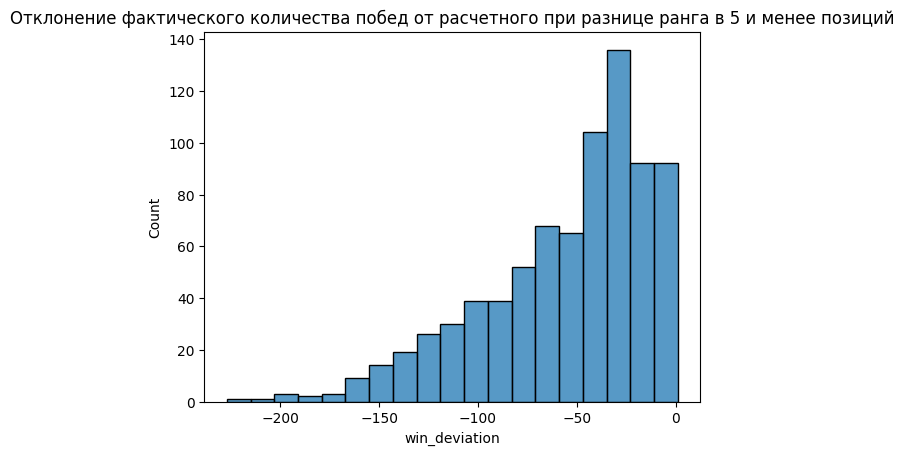

In [21]:
# Построение гистограммы
sns.histplot(x= 'win_deviation', data= winners).set_title('Отклонение фактического количества побед от расчетного при разнице ранга в 5 и менее позиций')
plt.show()

In [22]:
# Нулевая и альтернативная гипотезы
H0 = 'При различиях в рангах средняя вероятность не будет отличаться'
H1 = 'При различиях в рангах вероятность победы будет выше'
alpha = 0.05 # уровень значимости

# Тест Манна-Уитни
mann_whitneyu = mannwhitneyu(
    winners_plus_20['win_deviation'], 
    winners['win_deviation'], 
    alternative='greater'
)

# Сравнение полученного p-value с уровнем значимости
if mann_whitneyu.pvalue < alpha:
   print('Нулевая гипотеза отвергнута. Принята гипотеза Н1: {}'.format(H1))
else:
    print('Принята нулевая гипотеза: {}'.format(H0))


Нулевая гипотеза отвергнута. Принята гипотеза Н1: При различиях в рангах вероятность победы будет выше


**Вывод:** Гипотеза о большей вероятности победы при разнице в 20 рангов, по сравнению с разницей в 5 рангов не может быть отвергнута.

#### Задача 2

Правда ли, что среднее количество сетов, которое необходимо любому игроку для победы в матче, сокращается со временем? Разбейте данные на две группы — с 1980 до 2001 гг. и 2002-2022 гг. Как изменилось среднее количество сетов, которое победитель затратил на игру? Является ли разница средних этих двух выборок статистически значимой? Выбор статистического теста обоснуйте.

**Н0** - среднее количество сетов не меняется со сременем

**Н1** - среднее количество сетов, необходимое для победы, сокращается со временем

In [24]:
data_01 = [] # Датасет для игр 1980-2001
data_22 = [] # Датасет для игр 2002-2022

# Циклы для обхода всех файлов в папке
for year in range(1980, 2002):
    file_name = f'atp_matches_{year}.csv'
    file_path = os.path.join(folder_path, file_name)

    if os.path.exists(file_path):
        # Загрузка датасета из файла
        dataset = pd.read_csv(file_path)
        data_01.append(dataset)

for year in range(2002, 2023):
    file_name = f'atp_matches_{year}.csv'
    file_path = os.path.join(folder_path, file_name)

    if os.path.exists(file_path):
        # Загрузка датасета из файла
        dataset = pd.read_csv(file_path)
        data_22.append(dataset)

# Сбор датасетов
data_01 = pd.concat(data_01, ignore_index=True)
data_22 = pd.concat(data_22, ignore_index=True)

Теперь нужно посчитать количество сетов в каждой игре. Если я правильно поняла, количетсво сетов можно вытащить из колонки `score`, т.к. там представлено попарно количество очков за сет у каждого игрока в паре.

Для этого создадим столбец, где будет посчитано количество "-" в стобце `score`, т.к. каждая пара чисел, разделенная "-", предстваляет собой очки за 1 сет.

In [25]:
# Удаление пропусков
data_01.dropna(subset=['score'], inplace=True)
data_22.dropna(subset=['score'], inplace=True)

# Построчный подсчет "-" в столбце очков
data_01['set_count'] = data_01['score'].apply(lambda x: x.count('-'))
data_22['set_count'] = data_22['score'].apply(lambda x: x.count('-'))

Теперь сформируем сврдные таблицы по id победителя, где посчитаем количество сетов за каждый временной период

In [26]:
# Таблицы победителей

winner_set_01 = data_01.pivot_table(
    values='set_count',
    index='winner_id',
    aggfunc='sum'
).reset_index()

winner_set_22 = data_22.pivot_table(
    values='set_count',
    index='winner_id',
    aggfunc='sum'
).reset_index()

In [27]:
# Объединенная тоблица победителей
merge_set = pd.merge(winner_set_01, winner_set_22, on='winner_id', how='inner', suffixes=('_01','_22'))

merge_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   winner_id     326 non-null    int64
 1   set_count_01  326 non-null    int64
 2   set_count_22  326 non-null    int64
dtypes: int64(3)
memory usage: 7.8 KB


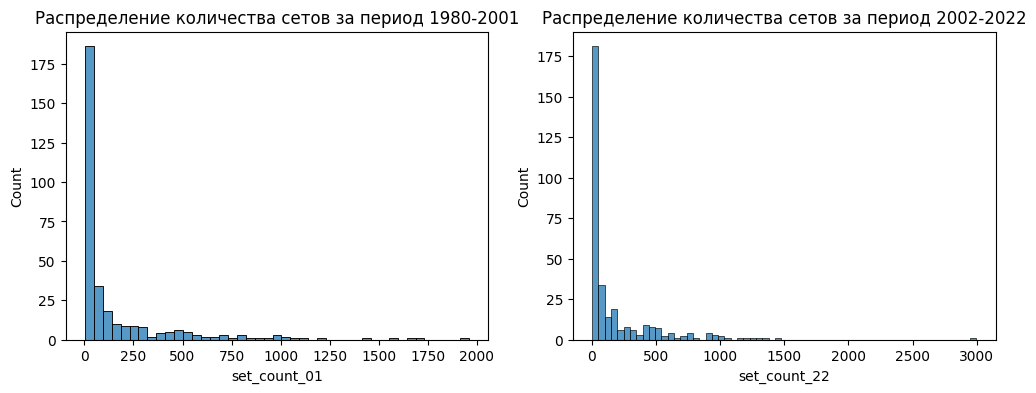

In [101]:
# Графики распредения
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#Гистограммы
sns.histplot(x='set_count_01', data=merge_set, ax=axes[0])
sns.histplot(x='set_count_22', data=merge_set, ax=axes[1])
axes[0].set_title('Распределение количества сетов за период 1980-2001')
axes[1].set_title('Распределение количества сетов за период 2002-2022')

**Вывод:** распределение отличается от нормального. Необходим непараметрический тест. 
Нам подходит знаковый ранговый **тест Уилкоксона**, т.к. обе выборки у нас связанны кол-вом сетов и игроками, но в разные периоды.

In [28]:
# Нулевая и альтернативная гипотезы
H0 = 'Среднее количество сетов для победы не меняется со сременем'
H1 = 'Среднее количество сетов для победы со сременем становится меньше'
alpha = 0.05 # уровень значимости

# Тест Уилкоксона
wilcoxon_test = wilcoxon(
    merge_set['set_count_01'],
    merge_set['set_count_22'],
    alternative='less'
)

# Сравнение полученного p-value с уровнем значимости
if wilcoxon_test.pvalue < alpha:
    print('Нулевая гипотеза отвергнута. Принята гипотеза Н1: {}'.format(H1))
else:
    print('Принята нулевая гипотеза: {}'.format(H0))

Принята нулевая гипотеза: Среднее количество сетов для победы не меняется со сременем


**Вывод:** нулевая гипетоеза не отвергнута: возможно со временем среднее количество сетов для победы становится меньше.

#### Задача 3

У вас появились сомнения — не является ли результат, который вы посчитали на предыдущем шаге, некорректным. Кажется, что на это мог повлиять формат самого матча — best of 3 или best of 5. Оставьте только матчи best of 5 (колонка best_of) и определите — является ли разница среднего количества сетов, которое сыграл победитель, значимой для выборок матчей по 1980 до 2001 гг. и 2002-2022 гг. Выбор статистического теста обоснуйте.

**Н0** - среднее количество сетов не меняется со сременем для матчей best of 5

**Н1** - среднее количество сетов, которое необходимо игроку для победы в матче best of 5, сокращается со временем

In [31]:
# Фильтрация датасетов по best of 5
best_5_01 = data_01[data_01['best_of'] == 5] # Датасет для игр 1980-2001
best_5_22 = data_22[data_22['best_of'] == 5] # Датасет для игр 2002-2022

In [32]:
# Кол-во сетов у игроков

winner_best_5_01 = best_5_01.pivot_table(
    values='set_count',
    index='winner_id',
    aggfunc='sum'
).reset_index()

winner_best_5_22 = best_5_22.pivot_table(
    values='set_count',
    index='winner_id',
    aggfunc='sum'
).reset_index()

# Объединение победителей за оба периода
merge_set_best_5 = pd.merge(
    winner_best_5_01,
    winner_best_5_22,
    on='winner_id', how='inner',
    suffixes=('_01', '_22')
)

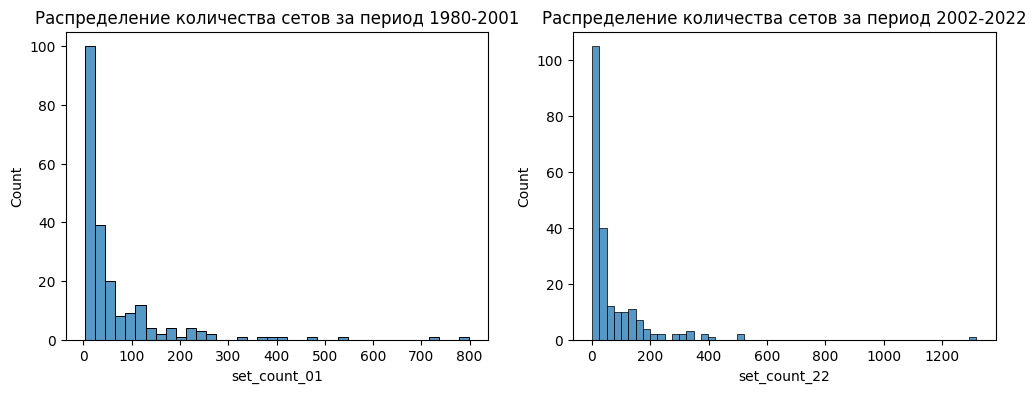

In [33]:
# Построение гистограммы
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(x='set_count_01', data=merge_set_best_5, ax=axes[0])
sns.histplot(x='set_count_22', data=merge_set_best_5, ax=axes[1])
axes[0].set_title('Распределение количества сетов за период 1980-2001');
axes[1].set_title('Распределение количества сетов за период 2002-2022');

**Вывод:** распределение отличается от нормального. Необходим непараметрический тест. Нам подходит знаковый ранговый **тест Уилкоксона**, т.к. обе выборки у нас связанны кол-вом сетов и игроками, но в разные периоды.

In [35]:
# Нулевая и альтернативная гипотезы
H0 = 'Среднее количество сетов для матчей best of 5 не меняется со сременем'
H1 = 'Среднее количество сетов для матчей best of 5 со сременем становится меньше'
alpha = 0.05 # уровень значимости

# вычисляем результат теста Уилкоксона для выборок
wilcoxon_test = wilcoxon(
    merge_set_best_5['set_count_01'],
    merge_set_best_5['set_count_22'],
    alternative='less'
)

# Сравнение полученного p-value с уровнем значимости
if wilcoxon_test.pvalue < alpha:
    print('Нулевая гипотеза отвергнута. Принята гипотеза Н1: {}'.format(H1))
else:
    print('Принята нулевая гипотеза: {}'.format(H0))

Принята нулевая гипотеза: Среднее количество сетов для матчей best of 5 не меняется со сременем


**Вывод:** нулевая гипетоеза не отвергнута: возможно со временем среднее количество сетов для победы становится меньше для матчей best of 5.

##Задача 4##

Вы хотите изучить психологическую устойчивость профессиональных игроков в теннис. Одним из важных показателей такой устойчивости будет доля выигранных брейк-поинтов. Возьмите трех игроков (они необязательно должны играть в одно и то же время. Можете взять игроков, которые сильно отличаются по рангу, а можете взять примерно равных игроков), для каждого из них посчитайте долю выигранных брейк поинтов (колонки, заканчивающиеся на bpFaced и bpSaved) отдельно в победных и проигранных матчах за минимум 10 лет (можно больше, но годы должны идти подряд). Постройте box-plot’ы для этих статистик для каждого из игроков. Являются ли эти распределения по годам (по победным и по проигранным матчам) независимыми для каждого из игроков? Если сравнивать эту статистику между игроками — будет ли разница в средних для проигранных и выигранных матчей значимой попарно между всеми игроками? Выбор статистического теста обоснуйте.

In [37]:
data4 = start_dataset.copy()

In [38]:
# Преобразование столбца с датой турнира в правильный формат
data4['tourney_date'] = pd.to_datetime(data4['tourney_date'], format='%Y%m%d')

# Вывод  года турнирав отдельный столбец, для отбора данных за 10 лет
data4['year'] = data4['tourney_date'].dt.year 

In [39]:
# Выбор стольцов для дальнейшего анализа и удаление пропусков
data4 = data4[['year', 'winner_id', 'loser_id', 'w_bpSaved', 'w_bpFaced', 'l_bpSaved', 'l_bpFaced']].dropna()
data4.head()

,year,winner_id,loser_id,w_bpSaved,w_bpFaced,l_bpSaved,l_bpFaced
10997,1990,101723,101414,2.0,4.0,6.0,8.0
10998,1990,100946,101256,9.0,10.0,1.0,2.0
10999,1990,101234,101421,1.0,1.0,4.0,8.0
11000,1990,101889,101703,3.0,3.0,5.0,8.0
11001,1990,101274,101843,7.0,8.0,4.0,8.0


In [40]:
# Выберем 3х игроков с наибольшим количеством отыгранных матчей
data4.groupby('winner_id')['year'].count().sort_values(ascending=False).head(25)

winner_id
103819    1195
104925    1054
104745    1044
103970     707
104918     705
101736     650
101948     631
104607     607
104755     590
104053     576
103720     573
105227     561
102338     555
104269     550
104527     544
102845     541
103163     530
104792     528
102021     527
103990     523
104468     498
103852     497
104022     479
104545     479
101965     474
Name: year, dtype: int64

In [ ]:
# Беру позиции 5, 10 и 15 
# 104918
# 104053
# 104527

In [41]:
# Проверка на наличие игр в течение 10 лет подряд
data4[(data4['winner_id'] == 104918) | (data4['loser_id'] == 104918)].groupby('year')['year'].count()

year
2005    23
2006    62
2007    59
2008    67
2009    75
2010    64
2011    65
2012    76
2013    47
2014    73
2015    77
2016    87
2017    35
2018    14
2019    16
2020     7
2021    29
2022    43
2023    33
Name: year, dtype: int64

In [42]:
data4[(data4['winner_id'] == 104053) | (data4['loser_id'] == 104053)].groupby('year')['year'].count()

year
2000     9
2001    55
2002    71
2003    87
2004    81
2005    69
2006    62
2007    64
2008    62
2009    61
2010    66
2011    47
2012    39
Name: year, dtype: int64

In [43]:
data4[(data4['winner_id'] == 104527) | (data4['loser_id'] == 104527)].groupby('year')['year'].count()

year
2003     6
2004     6
2005    27
2006    54
2007    48
2008    50
2009    47
2010    52
2011    52
2012    55
2013    73
2014    47
2015    72
2016    64
2017    37
2018    37
2019    49
2020    23
2021     6
2022    22
2023    49
Name: year, dtype: int64

In [44]:
players = [104918, 104053, 104527]

In [46]:
# Выберем из датасета только те года и те игры, где участвуют интересующие нас игроки
data4 = data4[(data4['year'] >= 2000) & (data4['year'] <= 2023)]

data4 = (data4[(data4['winner_id'].isin(players)) | data4['loser_id'].isin(players)])

In [47]:
# Колонка с результатом игры выбранного игрока
data4['game_result'] = data4.apply(lambda x: 1 if x['winner_id'] in players else 0 if x['loser_id'] in players else None, axis = 1 )

# Подсчет реализованных брейкпоинтов (bpSaved/bpFaced) в играх выбранных игроков
data4['bp'] = (
    data4.apply(lambda x: 
        round(x['w_bpSaved'] / x['w_bpFaced'] * 100, 1) if x['game_result'] == 1
        else round(x['l_bpSaved'] / x['l_bpSaved'] * 100, 1) if x['game_result'] == 0
        else None, 
        axis=1)
    )

# Замена Nan на 0
data4['bp'] = data4['bp'].fillna(0)

C:\Users\GrafGAD\AppData\Local\Temp\ipykernel_17732\3679171029.py:12: RuntimeWarning: invalid value encountered in scalar divide
  round(x['w_bpSaved'] / x['w_bpFaced'] * 100, 1) if x['game_result'] == 1
C:\Users\GrafGAD\AppData\Local\Temp\ipykernel_17732\3679171029.py:13: RuntimeWarning: invalid value encountered in scalar divide
  else round(x['l_bpSaved'] / x['l_bpSaved'] * 100, 1) if x['game_result'] == 0


In [48]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2192 entries, 57644 to 110243
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         2192 non-null   int32  
 1   winner_id    2192 non-null   int64  
 2   loser_id     2192 non-null   int64  
 3   w_bpSaved    2192 non-null   float64
 4   w_bpFaced    2192 non-null   float64
 5   l_bpSaved    2192 non-null   float64
 6   l_bpFaced    2192 non-null   float64
 7   game_result  2192 non-null   int64  
 8   bp           2192 non-null   float64
dtypes: float64(5), int32(1), int64(3)
memory usage: 162.7 KB


In [49]:
winner_BP = pd.DataFrame() # Датафрейм для побед
loser_BP = pd.DataFrame() # Датафрейм для поражений

# Подсчет среднего bp по годам
for id in players:
    id_win = data4[(data4['winner_id'] == id)]
    id_loose = data4[(data4['loser_id'] == id)]
    
    win_group = id_win.groupby('year').agg({'bp': 'mean'}).reset_index()
    win_group['id'] = id
    winner_BP = pd.concat([winner_BP, win_group], ignore_index=True)
    
    loose_group = id_win.groupby('year').agg({'bp': 'mean'}).reset_index()
    loose_group['id'] = id
    loser_BP = pd.concat([loser_BP, loose_group], ignore_index=True)    
    
    
winner_BP = winner_BP.pivot_table(
    values='bp',
    index='year',
    columns='id'
)

loser_BP = loser_BP.pivot_table(
    values='bp',
    index='year',
    columns='id'
)
    

In [50]:
winner_BP

id,104053,104527,104918
year,,,
2004,56.957576,NaN,NaN
2005,55.210714,55.135714,50.750000
2006,50.963043,56.893548,58.159459
2007,54.110417,61.432000,50.735556
2008,58.260870,55.280000,58.037255
2009,48.889130,67.114286,60.598438
2010,57.006250,74.031429,61.378261
2011,53.468750,64.281818,57.909615
2012,55.921739,66.760000,63.565000


In [51]:
loser_BP

id,104053,104527,104918
year,,,
2004,56.957576,NaN,NaN
2005,55.210714,55.135714,50.750000
2006,50.963043,56.893548,58.159459
2007,54.110417,61.432000,50.735556
2008,58.260870,55.280000,58.037255
2009,48.889130,67.114286,60.598438
2010,57.006250,74.031429,61.378261
2011,53.468750,64.281818,57.909615
2012,55.921739,66.760000,63.565000


In [55]:
combo_BP = pd.concat(
    [winner_BP, loser_BP],
    keys=['wins', 'loses'],
    axis = 1
)

In [56]:
combo_BP

wins                            loses                      
id       104053     104527     104918     104053     104527     104918
year                                                                  
2004  56.957576        NaN        NaN  56.957576        NaN        NaN
2005  55.210714  55.135714  50.750000  55.210714  55.135714  50.750000
2006  50.963043  56.893548  58.159459  50.963043  56.893548  58.159459
2007  54.110417  61.432000  50.735556  54.110417  61.432000  50.735556
2008  58.260870  55.280000  58.037255  58.260870  55.280000  58.037255
2009  48.889130  67.114286  60.598438  48.889130  67.114286  60.598438
2010  57.006250  74.031429  61.378261  57.006250  74.031429  61.378261
2011  53.468750  64.281818  57.909615  53.468750  64.281818  57.909615
2012  55.921739  66.760000  63.565000  55.921739  66.760000  63.565000
2013        NaN  61.350000  61.947368        NaN  61.350000  61.947368
2014        NaN  43.896774  54.772727        NaN  43.896774  54.772727
2015        NaN  66.014815  62.180952        NaN  66.014815  62.180952
2016        NaN  69.328261  57.420513        NaN  69.328261  57.420513
2017        NaN  64.007692  47.920000        NaN  64.007692  47.920000
2018        NaN  53.394737  70.412500        NaN  53.394737  70.412500
2019        NaN  66.254839  53.140000        NaN  66.254839  53.140000
2020        NaN  71.766667  63.833333        NaN  71.766667  63.833333
2021        NaN  51.666667  57.046667        NaN  51.666667  57.046667

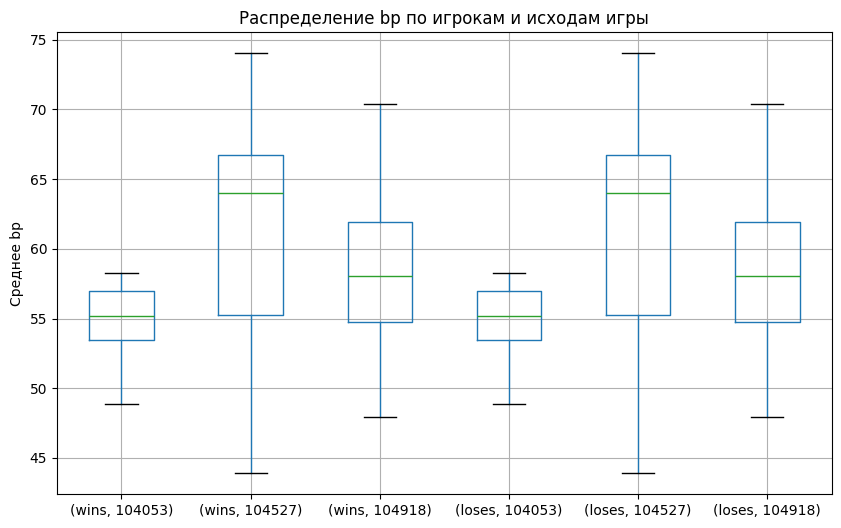

In [57]:
# Строим боксплоты для каждого столбца
plt.figure(figsize=(10, 6))
combo_BP.boxplot()
plt.title('Распределение bp по игрокам и исходам игры')
plt.ylabel('Среднее bp')
plt.show()


Выбран непараметрический, одновыборочный тест, который проверяет наличие связи между двумя переменными - тест хи-квадрат.

In [62]:
# Нулевая и альтернативная гипотезы
H0 = 'Распределения по годам независимы для каждого игрока'
H1 = 'Распределения по годам зависимы хотя бы для одного игрока'
alpha = 0.05 # уровень значимости

# Тест Хи-квадрат
result1 = chi2_contingency(combo_BP.iloc[:,[0, 3]])
result2 = chi2_contingency(combo_BP.iloc[:,[1, 4]])
result3 = chi2_contingency(combo_BP.iloc[:,[2, 5]])

# Сравнение полученного p-value с уровнем значимости
if (result1.pvalue < alpha) & (result2.pvalue < alpha) & (result3.pvalue < alpha):
    print('Нулевая гипотеза отвергнута. Принята гипотеза Н1: {}'.format(H1))
else:
    print('Принята нулевая гипотеза: {}'.format(H0))

Принята нулевая гипотеза: Распределения по годам независимы для каждого игрока


***
 Если сравнивать эту статистику между игроками — будет ли разница в средних для проигранных и выигранных матчей значимой попарно между всеми игроками?

**Н0** - распределения по годам (по победным и по проигранным матчам) попарно независимы для каждого из игроков


**Н1** - распределения по годам (по победным и по проигранным матчам) зависимы хотя бы для одной пары игроков
***
Для решения этого вопроса воспользуемся [тестом на независимость](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) из семейства тестов хи-квадрата (он же test of independence/association) — это непараметрический, одновыборочный тест, который проверяет наличие связи между двумя переменными.

In [63]:
# Нулевая и альтернативная гипотезы
H0 = 'Распределения по годам независимы для каждой пары игроков'
H1 = 'Распределения по годам зависимы хотя бы для одного игрока'
alpha = 0.05 # уровень значимости

# Тест Хи-квадрат
result1 = chi2_contingency(combo_BP.iloc[:,[0, 1]])
result2 = chi2_contingency(combo_BP.iloc[:,[0, 2]])
result3 = chi2_contingency(combo_BP.iloc[:,[1, 2]])
result4 = chi2_contingency(combo_BP.iloc[:,[3, 4]])
result5 = chi2_contingency(combo_BP.iloc[:,[3, 5]])
result6 = chi2_contingency(combo_BP.iloc[:,[4, 5]])


# Сравнение полученного p-value с уровнем значимости
if (result1.pvalue < alpha) & (result2.pvalue < alpha) & \
    (result3.pvalue < alpha) & (result4.pvalue < alpha) & \
    (result5.pvalue < alpha) & (result6.pvalue < alpha):
    print('Нулевая гипотеза отвергнута. Принята гипотеза Н1: {}'.format(H1))
else:
    print('Принята нулевая гипотеза: {}'.format(H0))

Принята нулевая гипотеза: Распределения по годам независимы для каждой пары игроков


**Выводы:** 
- Распределения по годам (по победным и по проигранным матчам) являются независимыми для каждого из игроков.
- Разница в средних для проигранных и выигранных матчей попарно между всеми игроками незначима.

##Задача 5##

У вас есть гипотеза, что доля выигранных брейк-поинтов связана с вероятностью победить в игре. Соберите статистику, где для каждого матча будет собран его исход (победа/поражение) и доля выигранных брейк-поинтов (не забудьте, что в матче два игрока). Разделите долю выигранных брейкпоинтов на группы выше/ниже медианы и, используя информацию о исходе матча, проверьте зависимость между количеством выигранных брейкпоинтов и результатом матча. Насколько сильна эта зависимость? Выбор статистического теста обоснуйте.

In [64]:
data5 = start_dataset.copy()

In [65]:
data5.dropna(
    subset=['w_bpSaved', 'w_bpFaced', 'l_bpSaved', 'l_bpFaced'],
    inplace=True
)

In [66]:

# (wbpSaved + lbpSaved) / (wbpFaced + lbpFaced)

data5['win_bp'] = round(
    ((data5['w_bpSaved'] + data5['l_bpSaved']) / (data5['w_bpFaced'] + data5['l_bpFaced']))
)


In [67]:
# data5.head()
data5['win_bp']

10997     1.0
10998     1.0
10999     1.0
11000     1.0
11001     1.0
         ... 
116157    1.0
116159    0.0
116160    0.0
116193    1.0
116210    0.0
Name: win_bp, Length: 95034, dtype: float64

In [68]:
data5 = data5[['tourney_id', 'match_num', 'winner_id', 'loser_id', 'win_bp']]

In [69]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95034 entries, 10997 to 116210
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tourney_id  95034 non-null  object 
 1   match_num   95034 non-null  int64  
 2   winner_id   95034 non-null  int64  
 3   loser_id    95034 non-null  int64  
 4   win_bp      94956 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.4+ MB


In [70]:
data5.head()

,tourney_id,match_num,winner_id,loser_id,win_bp
10997,1991-339,1,101723,101414,1.0
10998,1991-339,2,100946,101256,1.0
10999,1991-339,3,101234,101421,1.0
11000,1991-339,4,101889,101703,1.0
11001,1991-339,5,101274,101843,1.0


In [71]:
median_bp = data5['win_bp'].median()
median_bp

1.0